In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [4]:
df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz")

/tmp/ipykernel_48/2658612737.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz")


# EDA

In [5]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

most of these rows are not useful for us

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260664.00,2258957.00,2260639.00,2260668.00,...,10917.00,10917.00,10917.00,10917.00,8651.00,10917.00,10917.00,34246.00,34246.00,34246.00
mean,NaN,15046.93,15041.66,15023.44,13.09,445.81,77992.43,18.82,0.31,698.59,...,3.00,155.05,3.00,13.74,454.80,11636.88,193.99,5010.66,47.78,13.19
std,NaN,9190.25,9188.41,9192.33,4.83,267.17,112696.20,14.18,0.87,33.01,...,0.00,129.04,0.00,9.67,375.39,7625.99,198.63,3693.12,7.31,8.16
min,NaN,500.00,500.00,0.00,5.31,4.93,0.00,-1.00,0.00,610.00,...,3.00,0.64,3.00,0.00,1.92,55.73,0.01,44.21,0.20,0.00
25%,NaN,8000.00,8000.00,8000.00,9.49,251.65,46000.00,11.89,0.00,675.00,...,3.00,59.44,3.00,5.00,175.23,5627.00,44.44,2208.00,45.00,6.00
50%,NaN,12900.00,12875.00,12800.00,12.62,377.99,65000.00,17.84,0.00,690.00,...,3.00,119.14,3.00,15.00,352.77,10028.39,133.16,4146.11,45.00,14.00
75%,NaN,20000.00,20000.00,20000.00,15.99,593.32,93000.00,24.49,0.00,715.00,...,3.00,213.26,3.00,22.00,620.17,16151.89,284.19,6850.17,50.00,18.00
max,NaN,40000.00,40000.00,40000.00,30.99,1719.83,110000000.00,999.00,58.00,845.00,...,3.00,943.94,3.00,37.00,2680.89,40306.41,1407.86,33601.00,521.35,181.00


In [10]:
df.isnull().sum().sort_values(ascending=False).head(20)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_last_payment_amount                  2249784
hardship_payoff_balance_amount                2249784
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_length                               2249784
payment_plan_start_date                       2249784
hardship_amount                               2249784
settlement_term                               2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

The null fields are used after the loan is passed

In [11]:
useful_cols = [
'loan_amnt',
'term',
'int_rate',
'installment',
'grade',
'sub_grade',
'emp_length',
'home_ownership',
'annual_inc',
'purpose',
'dti',
'fico_range_low',
'fico_range_high',
'loan_status',
'revol_util',
'total_acc',
'issue_d',
'addr_state',
]

### Feature Definitions (Selected LendingClub Columns)

| Feature Name      | Definition                                                                        | Why It Matters (Credit Risk Insight) |
|------------------|------------------------------------------------------------------------------------|--------------------------------------|
| **loan_amnt** | Total loan amount requested by the borrower. | Larger loans → higher default impact. |
| **term** | Length of the loan (e.g., 36 or 60 months). | Longer terms often have higher default risk due to extended repayment period. |
| **int_rate** | Interest rate assigned to the loan. | Higher interest ↑ means LendingClub considers the borrower riskier. |
| **installment** | Monthly payment amount the borrower must pay. | Higher installments increase repayment burden. |
| **grade** | LendingClub’s internal credit grade (A–G). | Summarizes borrower risk tier (A = safest). |
| **sub_grade** | More detailed credit grade (A1–G5). | Finer segmentation of credit risk. |
| **emp_length** | Number of years the borrower has been employed. | Longer employment = financial stability = lower risk. |
| **home_ownership** | Whether the borrower owns/rents (OWN/MORTGAGE/RENT). | Homeowners usually default less; renters more. |
| **annual_inc** | Borrower’s annual income. | Higher income → better ability to repay. |
| **purpose** | Purpose of the loan (debt consolidation, credit card, etc.). | Some purposes (small business) are riskier than others. |
| **dti** | Debt-to-income ratio. | High DTI → borrower already has heavy debt load → higher default risk. |
| **fico_range_low** | Lower bound of borrower’s FICO credit score. | Higher score = more creditworthy. |
| **fico_range_high** | Upper bound of borrower’s FICO credit score. | Helps determine borrower’s credit score range. |
| **loan_status** | Final loan outcome (Fully Paid / Charged Off / Late / Current). | **Target variable for predicting default.** |
| **revol_util** | Revolving credit utilization ratio. | High utilization shows credit stress → higher risk. |
| **total_acc** | Total number of credit accounts ever opened. | More accounts = deeper credit history. |
| **issue_d** | Month the loan was issued. | Useful for time-based patterns and cohort analysis. |
| **addr_state** | State of the borrower’s address. | Helps detect geographical risk trends. |


In [12]:
df = df[useful_cols]

only keeping the fields that are useful for us

In [13]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,fico_range_low,fico_range_high,loan_status,revol_util,total_acc,issue_d,addr_state
2054251,40000.00,60 months,15.05,952.65,C,C4,2 years,MORTGAGE,200000.00,credit_card,11.42,665.00,669.00,Current,56.30,25.00,Dec-2017,GA
1693522,24100.00,60 months,16.99,598.82,D,D1,10+ years,RENT,80000.00,credit_card,26.61,690.00,694.00,Current,79.20,14.00,Mar-2017,CA
41528,35000.00,60 months,17.57,880.61,D,D4,3 years,RENT,80000.00,credit_card,35.04,695.00,699.00,Current,75.10,28.00,Dec-2015,TX
1367338,30000.00,36 months,23.40,1167.56,E,E1,5 years,RENT,84000.00,debt_consolidation,21.83,675.00,679.00,Current,64.80,28.00,Dec-2018,CA
1960186,12000.00,60 months,10.99,260.85,B,B4,10+ years,MORTGAGE,120000.00,home_improvement,16.02,700.00,704.00,Charged Off,28.40,38.00,Sep-2016,NY


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amnt        float64
 1   term             object 
 2   int_rate         float64
 3   installment      float64
 4   grade            object 
 5   sub_grade        object 
 6   emp_length       object 
 7   home_ownership   object 
 8   annual_inc       float64
 9   purpose          object 
 10  dti              float64
 11  fico_range_low   float64
 12  fico_range_high  float64
 13  loan_status      object 
 14  revol_util       float64
 15  total_acc        float64
 16  issue_d          object 
 17  addr_state       object 
dtypes: float64(9), object(9)
memory usage: 310.5+ MB


converting 36 months = 36

In [15]:
df['term'] = df['term'].str.extract('(\d+)').fillna(0).astype(int)

In [16]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

making binary rissk labelling

In [17]:
bad_status = [
    'Charged Off', 'Default', 
    'Late (31-120 days)', 'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
]

df['target'] = df['loan_status'].apply(lambda x: 1 if x in bad_status else 0)


Handle High-Cardinality Categorical Columns

In [18]:
grade_map = {g:i for i,g in enumerate(['A','B','C','D','E','F','G'])}
df['grade'] = df['grade'].map(grade_map)


In [19]:
df['sub_grade_num'] = df['sub_grade'].str[0].map(grade_map)
df['sub_grade_level'] = df['sub_grade'].str[1].astype(float)


one hot encodig

In [20]:
df = pd.get_dummies(df, columns=['purpose', 'home_ownership', 'addr_state'], drop_first=True)

In [21]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')

In [22]:
df['issue_d'].dtype


dtype('<M8[ns]')

In [23]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month


# Graphs

##### --- 1) Default rate by grade ---

Grade default rates (descending):
grade
6.00   0.40
5.00   0.37
4.00   0.29
3.00   0.21
2.00   0.15
1.00   0.09
0.00   0.04
Name: target, dtype: float64


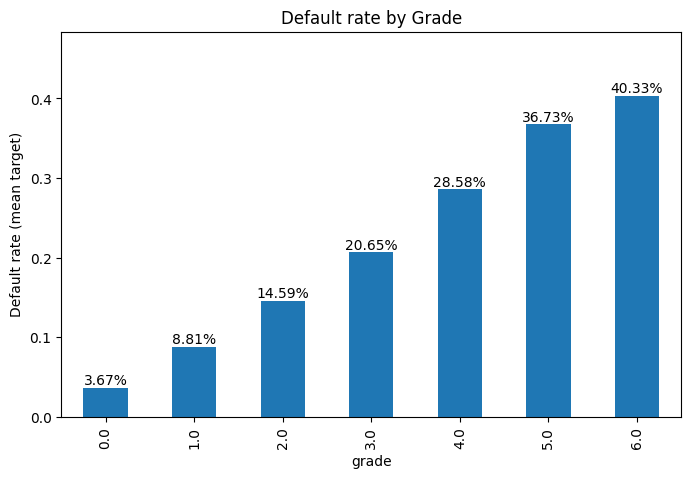

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
grade_df = df.groupby('grade', observed=True)['target'].mean().sort_index()
grade_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Default rate (mean target)')
ax.set_title('Default rate by Grade')
ax.set_ylim(0, grade_df.max()*1.2)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Print quick summary
print("Grade default rates (descending):")
print(grade_df.sort_values(ascending=False).round(4))

**Observation:**

Default rate increases steadily from grade A → G (0 → 6).

A-grade borrowers default the least (~3–4%).

G-grade borrowers default the most (~40%).

**Interpretation:**

LendingClub’s grading system works correctly — lower grades = higher credit risk.

Grade is one of the strongest predictors of loan default.

##### --- 2) Default vs FICO range (scatter + binning) ---

/tmp/ipykernel_48/3624411741.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fico_agg = df.groupby('fico_bucket')['target'].agg(['mean','count']).dropna()
/tmp/ipykernel_48/3624411741.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fico_agg.index.astype(str), rotation=45, ha='right')


FICO bucket sample (first 8):
             mean   count
fico_bucket              
(600, 620]   0.33       3
(620, 640]   0.50      14
(640, 660]   0.30     472
(660, 680]   0.18  713474
(680, 700]   0.14  590839
(700, 720]   0.11  427701
(720, 740]   0.08  246093
(740, 760]   0.07  131231


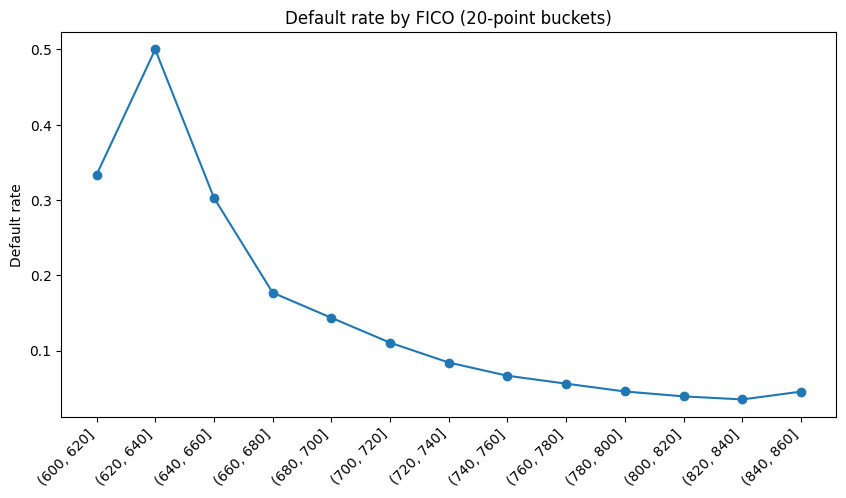

In [25]:
# Aggregate by fico buckets to reduce overplotting
df['fico_mid'] = df[['fico_range_low', 'fico_range_high']].mean(axis=1)
df['fico_bucket'] = pd.cut(df['fico_mid'], bins=np.arange(300, 901, 20))
fico_agg = df.groupby('fico_bucket')['target'].agg(['mean','count']).dropna()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fico_agg.index.astype(str), fico_agg['mean'], marker='o', linestyle='-')
ax.set_xticklabels(fico_agg.index.astype(str), rotation=45, ha='right')
ax.set_ylabel('Default rate')
ax.set_title('Default rate by FICO (20-point buckets)')
print("FICO bucket sample (first 8):")
print(fico_agg.head(8).round(4))


**Observation:**

Very high default (~50%) for low FICO (620–640).

After ~660, default rate drops consistently.

Above 750, default rate becomes very low (<8%).

**Interpretation:**

FICO score is a powerful negative predictor of default.

Borrowers with FICO < 660 represent high risk.

##### --- 3) DTI vs default (bar by bucket) ---

/tmp/ipykernel_48/3177485229.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_tab = df.groupby('dti_bucket')['target'].agg(['mean','count']).reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


  dti_bucket  mean   count
0        <10  0.10  410380
1      10-20  0.12  922666
2      20-30  0.15  682257
3      30-40  0.18  218220
4     40-100  0.10   24617
5       100+  0.08    2561


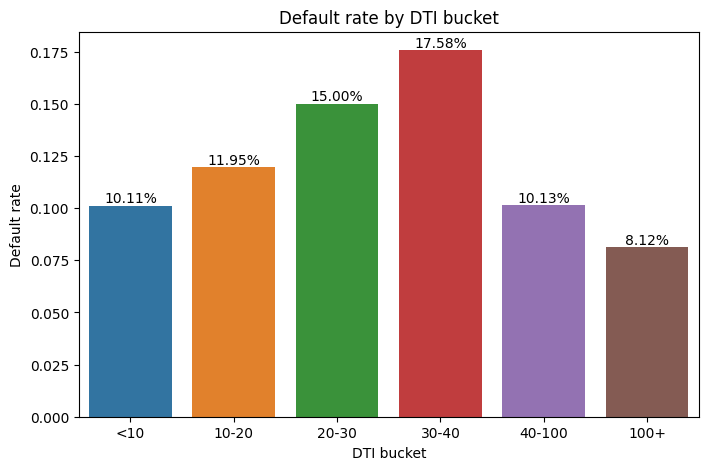

In [26]:
dti_bins = [-1, 10, 20, 30, 40, 100, np.inf]
dti_labels = ['<10','10-20','20-30','30-40','40-100','100+']
df['dti_bucket'] = pd.cut(df['dti'].fillna(-1), bins=dti_bins, labels=dti_labels, include_lowest=True)
dti_tab = df.groupby('dti_bucket')['target'].agg(['mean','count']).reset_index()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=dti_tab, x='dti_bucket', y='mean', order=dti_labels, ax=ax)
ax.set_xlabel('DTI bucket')
ax.set_ylabel('Default rate')
ax.set_title('Default rate by DTI bucket')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=10)
print(dti_tab)

**Observation:**

Default rate rises from:

<10 DTI → ~10%

30–40 DTI → ~17% (peak)

After 40+, default rate decreases slightly (likely because very high DTIs get fewer loans approved → sample bias).

**Interpretation:**

Borrowers with DTI 30–40 are the riskiest.

Very high DTI borrowers might be filtered out by LC, causing lower observed default.

##### --- 4) Purpose vs default (top purposes) ---

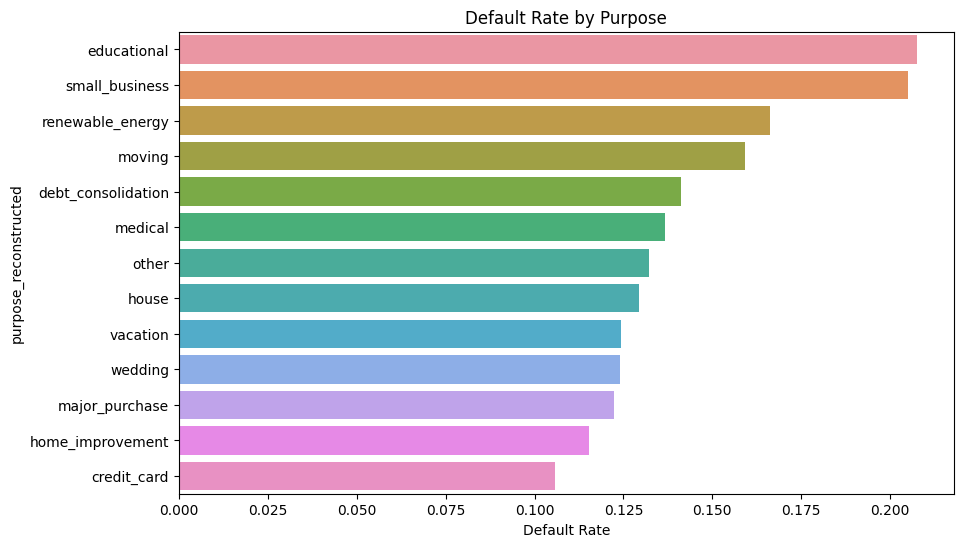

In [27]:
purpose_cols = [c for c in df.columns if c.startswith("purpose_")]
df["purpose_reconstructed"] = df[purpose_cols].idxmax(axis=1).str.replace("purpose_", "")

purpose_agg = (
    df.groupby("purpose_reconstructed")["target"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=purpose_agg.values,
    y=purpose_agg.index,
    orient='h'
)
plt.xlabel("Default Rate")
plt.title("Default Rate by Purpose")
plt.show()


**Observation (highest to lowest default):**

Educational, Small Business, and Renewable Energy show highest defaults (>18–22%).

Credit card, home improvement, major purchase are much safer (<13%).

**Interpretation:**

Education loans and small-business loans are riskier because they depend on future income/business success.

Credit card consolidation loans are relatively low risk because borrowers are replacing existing debt.

##### --- 5) Revol_util vs default (scatter + rolling) ---

/tmp/ipykernel_48/4109112398.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revol_agg = df.groupby('revol_bin')['target'].agg(['mean','count']).reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


  revol_bin  mean   count
0        NA  0.09  121304
1      0-10  0.10  278338
2     10-25  0.12  723240
3     25-50  0.14  715563
4     50-75  0.15  294070
5     75-90  0.16  119008
6   90-100+  0.19    7343


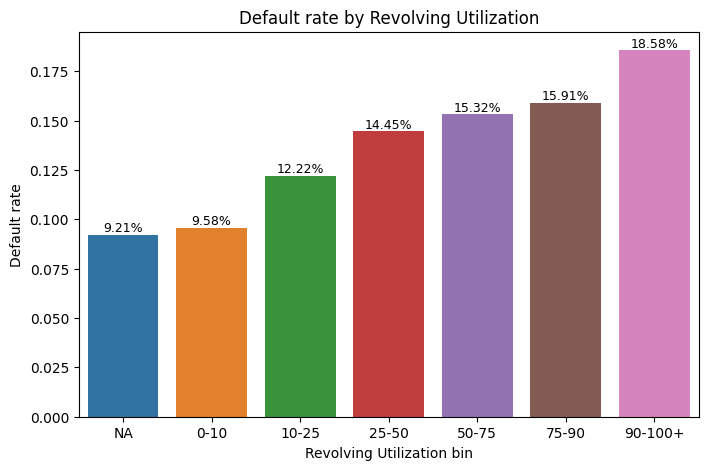

In [28]:
df['revol_bin'] = pd.cut(df['revol_util'].fillna(-1), bins=[-1,10,25,50,75,90,100, np.inf], labels=['NA','0-10','10-25','25-50','50-75','75-90','90-100+'])
revol_agg = df.groupby('revol_bin')['target'].agg(['mean','count']).reset_index()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=revol_agg, x='revol_bin', y='mean', ax=ax, order=revol_agg['revol_bin'])
ax.set_xlabel('Revolving Utilization bin')
ax.set_ylabel('Default rate')
ax.set_title('Default rate by Revolving Utilization')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=9)
print(revol_agg)

**Observation:**

Default jumps sharply as utilization increases:

<10% → ~9–10% default

25–50% → ~14%

90–100%+ → ~18.58%

**Interpretation:**

High credit card utilization is a clear indicator of financial stress.

Borrowers maxing out their credit have much higher risk.

##### --- 6) Loan amount vs interest rate (scatter with LOESS-like smoothing) ---

/tmp/ipykernel_48/2626007715.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = sample.groupby(pd.cut(sample['loan_amnt'], bins=30))['int_rate'].mean()


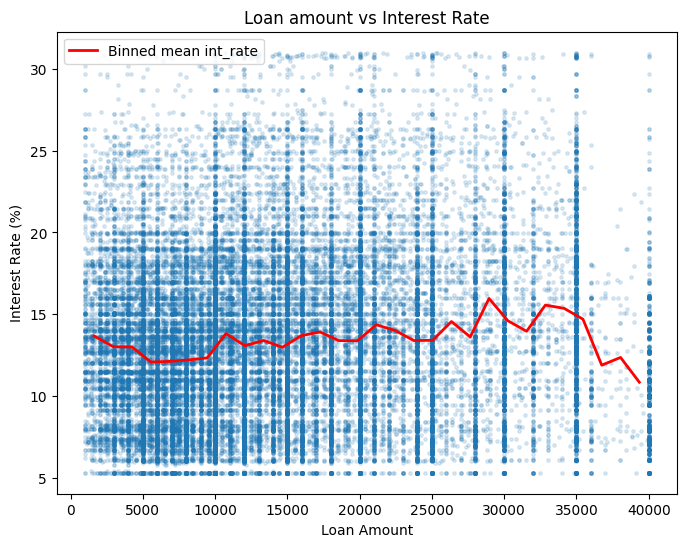

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
# sample for plotting speed if dataset is large
sample = df.sample(n=50000, random_state=42) if len(df)>50000 else df
ax.scatter(sample['loan_amnt'], sample['int_rate'], s=6, alpha=0.15)
# Add binned mean line
binned = sample.groupby(pd.cut(sample['loan_amnt'], bins=30))['int_rate'].mean()
ax.plot([interval.mid for interval in binned.index.categories], binned.values, color='red', lw=2, label='Binned mean int_rate')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Interest Rate (%)')
ax.set_title('Loan amount vs Interest Rate')
ax.legend()

**Observation:**

Scatter is dense, but trend line shows:

Interest rate generally increases with loan amount until ~30k.

After 30k, interest decreases (likely only high-quality borrowers qualify for very large loans).

**Interpretation:**

Larger loans = higher risk → higher interest.

But extremely large loans are approved only for high-FICO borrowers, lowering final interest.

##### --- 7) State-wise default heatmap (map-like table) ---

                          mean   count
addr_state_reconstructed              
MS                        0.16   12639
AR                        0.15   17074
AL                        0.15   32548
OK                        0.15   20691
LA                        0.15   25759
NV                        0.15   32657
NY                        0.14  186389
NM                        0.14   11986
FL                        0.14  161991
HI                        0.14   10668
SD                        0.14    4549
MO                        0.14   36084
MD                        0.14   54008
NC                        0.14   62730
PA                        0.14   76939


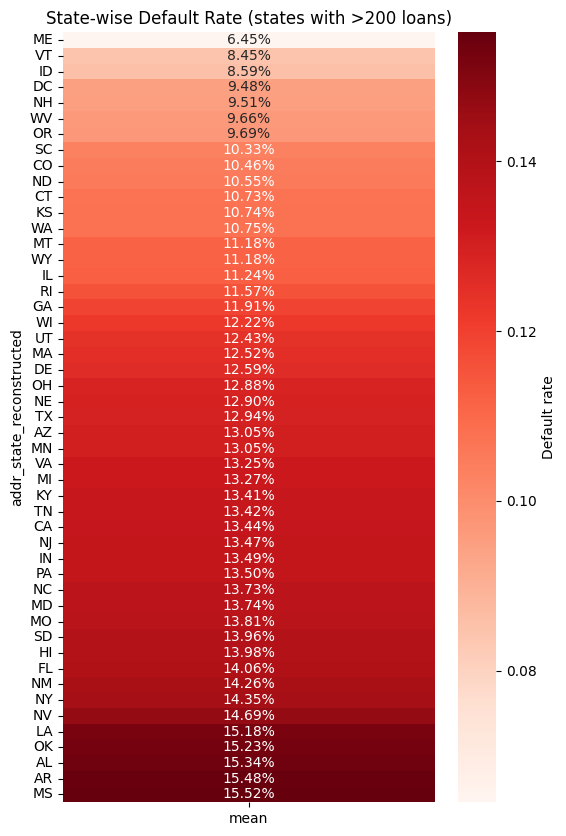

In [30]:
# Aggregate by state; keep top N states for clarity
# Find all one-hot encoded state columns
state_cols = [col for col in df.columns if col.startswith("addr_state_")]

# Reconstruct original state
df['addr_state_reconstructed'] = (
    df[state_cols]
    .idxmax(axis=1)
    .str.replace("addr_state_", "")
)

# Aggregate by reconstructed state; keep top N states for clarity
state_agg = df.groupby('addr_state_reconstructed', observed=True)['target'] \
              .agg(['mean','count']).dropna()

state_agg = state_agg[state_agg['count'] > 200]   # filter states with few loans
state_agg = state_agg.sort_values('mean', ascending=False)

# Heatmap
fig, ax = plt.subplots(figsize=(6,10))
sns.heatmap(
    state_agg[['mean']].sort_values('mean', ascending=True),
    annot=True,
    fmt=".2%",
    cmap='Reds',
    cbar_kws={'label':'Default rate'},
    ax=ax
)

ax.set_title('State-wise Default Rate (states with >200 loans)')

print(state_agg.head(15).round(4))


**Observation:**

Lowest default: ME, VT, ID, DC (~6–9%).

Highest default: MS, AL, AR, OK, LA (~15–16%).

**Interpretation:**

Southern states show higher financial stress and possibly lower average income.

New England and Mountain states perform better.

**General Patterns:**

* Lower credit quality → higher default.

* More debt → higher default.

* Loan purpose matters significantly (business + education = risky).

* Certain states consistently show higher financial stress.

# Data Preprocessing for Modeling

In [35]:
features_to_keep = [

    # numeric
    'loan_amnt', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade_num', 'emp_length', 'annual_inc',
    'dti', 'fico_mid', 'revol_util', 'total_acc',
    'issue_year', 'issue_month',

    # one-hot encoded categories
] + [col for col in df.columns if col.startswith('purpose_')] \
  + [col for col in df.columns if col.startswith('home_ownership_')] \
  + [col for col in df.columns if col.startswith('addr_state_')] \
  + ['target']


In [36]:
cols_to_drop = [
    'fico_range_low', 'fico_range_high', 'loan_status', 'issue_d',
    'purpose_reconstructed', 'addr_state_reconstructed',
    'fico_bucket', 'dti_bucket', 'revol_bin',
    'sub_grade',
]


In [37]:
df = df.drop(columns=cols_to_drop, errors='ignore')
df = df[features_to_keep]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 83 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        int64  
 2   int_rate                    float64
 3   installment                 float64
 4   grade                       float64
 5   sub_grade_num               float64
 6   emp_length                  int64  
 7   annual_inc                  float64
 8   dti                         float64
 9   fico_mid                    float64
 10  revol_util                  float64
 11  total_acc                   float64
 12  issue_year                  float64
 13  issue_month                 float64
 14  purpose_credit_card         bool   
 15  purpose_debt_consolidation  bool   
 16  purpose_educational         bool   
 17  purpose_home_improvement    bool   
 18  purpose_house               bool   
 19  purpose_major_purchas

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


X = df.drop(columns=['target'])
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
# Handle class imbalance
# scale_pos_weight = (negative samples / positive samples)
pos = y_train.sum()
neg = len(y_train) - pos
scale = neg / pos

In [42]:
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    eval_metric='logloss',
    tree_method='hist',             
    n_jobs=-1
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [43]:
# Prediction and evaluation
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.752112139210355

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76    393106
           1       0.23      0.73      0.35     59035

    accuracy                           0.65    452141
   macro avg       0.59      0.69      0.56    452141
weighted avg       0.85      0.65      0.71    452141


Confusion Matrix:
 [[250096 143010]
 [ 15703  43332]]


# Conclusion
An XGBoost model was trained to predict loan default.
Performance:

ROC–AUC: 0.75

Recall (defaulters): 0.73

Precision (defaulters): 0.23

Accuracy: 65%

The model captures defaulters well (high recall) but produces many false positives due to class imbalance. Overall, XGBoost provides a strong baseline with good separation ability. Further performance gains are possible using parameter tuning, class-balancing, and additional feature engineering.